<a href="https://colab.research.google.com/github/iyadh97/food-sales-predictions/blob/main/Assignment_Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project 1 - Part 2 (Core)**
We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

In [ ]:
#import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
filename='/content/sales_predictions_2023.csv'

In [ ]:
df_sales_predictions=pd.read_csv(filename)
df_sales_predictions.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### **For Part 2**,
 your task is to  use Pandas to start cleaning and exploring the data. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

* Your data should already be loaded into your notebook from part 1 of the project.
* Explore the data - what do you need to do to clean this data? Clean it!  
* Be sure to address each of the following tasks:

**1) How many rows and columns?**

In [ ]:
df_sales_predictions.shape

(8523, 12)

In [ ]:
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**3) Are there duplicates? If so, drop any duplicates.**

In [ ]:
df_sales_predictions.duplicated().sum()
#output : 0 there are no duplicates in this dataframe


0

In [ ]:
# Remove duplicates
df_sales_predictions = df_sales_predictions.drop_duplicates()

**4) Identify missing values.**

In [ ]:
df_sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).**

In [ ]:
# Fill missing values with mean for Item_Weight
df_sales_predictions['Item_Weight'].fillna(df_sales_predictions['Item_Weight'].mean(), inplace=True)


In [ ]:
# Fill missing values with mode for Outlet_Size
df_sales_predictions['Outlet_Size'].fillna(df_sales_predictions['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
df_sales_predictions.sample(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7490,FDT46,11.350000,Low Fat,0.030933,Snack Foods,51.5008,OUT018,2009,Medium,Tier 3,Supermarket Type2,607.2096
7605,FDD53,16.200000,Low Fat,0.044473,Frozen Foods,43.3454,OUT017,2007,Medium,Tier 2,Supermarket Type1,922.7988
1633,FDZ34,6.695000,Low Fat,0.000000,Starchy Foods,191.8820,OUT013,1987,High,Tier 3,Supermarket Type1,3861.6400
2742,NCV41,12.857645,LF,0.016956,Health and Hygiene,109.3228,OUT027,1985,Medium,Tier 3,Supermarket Type3,2431.5016
8363,DRE48,8.430000,Low Fat,0.017396,Soft Drinks,196.0768,OUT018,2009,Medium,Tier 3,Supermarket Type2,4138.6128
3792,FDM21,20.200000,Low Fat,0.064495,Snack Foods,259.2646,OUT045,2002,Medium,Tier 2,Supermarket Type1,3091.9752
6963,FDO19,17.700000,Regular,0.000000,Fruits and Vegetables,46.8034,OUT017,2007,Medium,Tier 2,Supermarket Type1,923.4646
3344,FDS20,8.850000,Low Fat,0.053976,Fruits and Vegetables,181.5292,OUT045,2002,Medium,Tier 2,Supermarket Type1,1277.0044
3968,FDD26,12.857645,Regular,0.071806,Canned,186.5924,OUT027,1985,Medium,Tier 3,Supermarket Type3,5182.5872
1868,FDS01,11.600000,Low Fat,0.017745,Canned,177.9686,OUT046,1997,Small,Tier 1,Supermarket Type1,1244.3802


1. In this approach, I filled the missing values in the "**Item_Weight**" column with the mean of the available values. This is a reasonable choice as the mean provides a representative value without significantly affecting the overall distribution.

2. For the "**Outlet_Size**" column, I filled the missing values with the mode (most frequent value) of the column. This is a suitable choice as the mode represents the most common outlet size and can help maintain the consistency of the data.
*************************************

6) Confirm that there are no missing values after addressing them.

In [ ]:
df_sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [ ]:
df_sales_predictions.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [ ]:
# Identify categorical columns
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size',
                       'Outlet_Location_Type', 'Outlet_Type']

# Inspect unique values in each categorical column
for column in categorical_columns:
    unique_values = df_sales_predictions[column].unique()
    print(f"\nUnique values in {column}: {unique_values}")


Unique values in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values in Outlet_Size: ['Medium' 'High' 'Small']

Unique values in Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']

Unique values in Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**there are some inconsistent categories in the 'Item_Fat_Content' column.**

In [ ]:
df_sales_predictions['Item_Fat_Content']=df_sales_predictions['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

print(f"\nUnique values in Item_Fat_Content column are : {df_sales_predictions['Item_Fat_Content'].unique()}")



Unique values in Item_Fat_Content column are : ['Low Fat' 'Regular']


**8) For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [ ]:
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Obtain summary statistics of numerical columns
summary_stats = df_sales_predictions[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].describe()

# Display the summary statistics
summary_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## **Project 1 - Part 3 (Core)**
We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

* Histogram to view the distributions of various features in your dataset.
* Boxplot to view statistical summaries of various features in your dataset.
* Heatmap of the correlation between features.

In [ ]:
df_sales_predictions.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4847,FDU16,19.250000,Regular,0.058227,Frozen Foods,85.2908,OUT013,1987,High,Tier 3,Supermarket Type1,671.1264
1393,DRM37,12.857645,Low Fat,0.095931,Soft Drinks,198.5768,OUT027,1985,Medium,Tier 3,Supermarket Type3,6897.6880
4469,FDT23,7.720000,Regular,0.074669,Breads,76.3986,OUT013,1987,High,Tier 3,Supermarket Type1,1402.1748
6750,FDO48,15.000000,Regular,0.026818,Baking Goods,219.7456,OUT013,1987,High,Tier 3,Supermarket Type1,3094.6384
4212,FDZ44,8.185000,Low Fat,0.038729,Fruits and Vegetables,117.1808,OUT046,1997,Small,Tier 1,Supermarket Type1,1874.8928


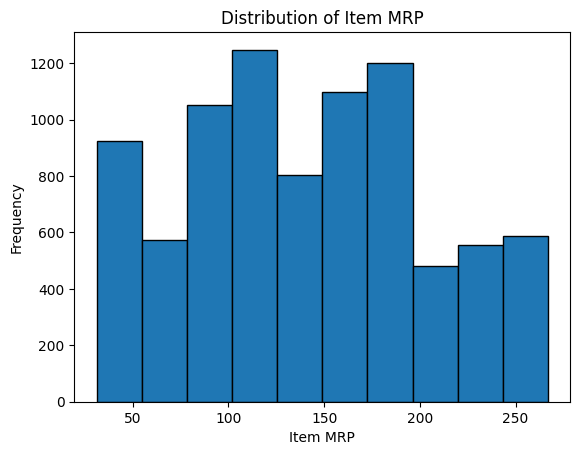

In [39]:
# Plot histogram for 'Item_MRP'
plt.hist(df_sales_predictions['Item_MRP'], bins=10, edgecolor='k')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.title('Distribution of Item MRP')
plt.show()

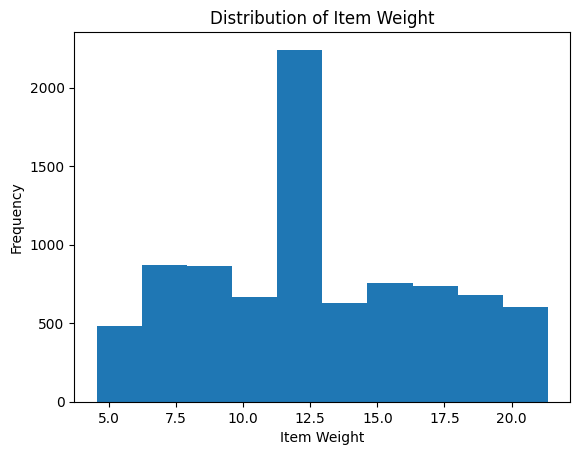

In [26]:
plt.hist(df_sales_predictions['Item_Weight'], bins=10)
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Item Weight')
plt.show()

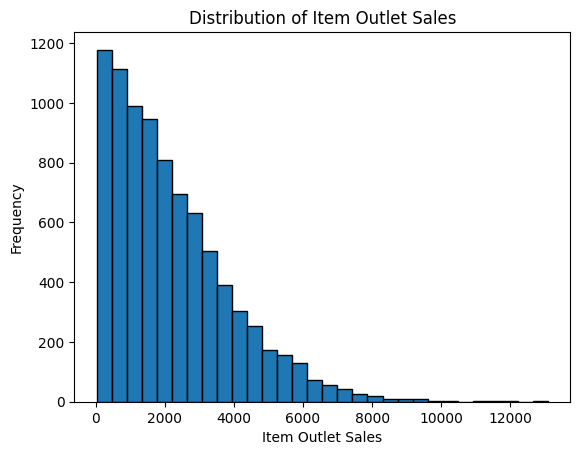

In [42]:
plt.hist(df_sales_predictions['Item_Outlet_Sales'], bins=30,edgecolor='k')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Item Outlet Sales')
plt.show()

**we can see that the number of outlet sales is decreasing while the price is increasing**
* this is a Right-skewed distribution (positively skewed)

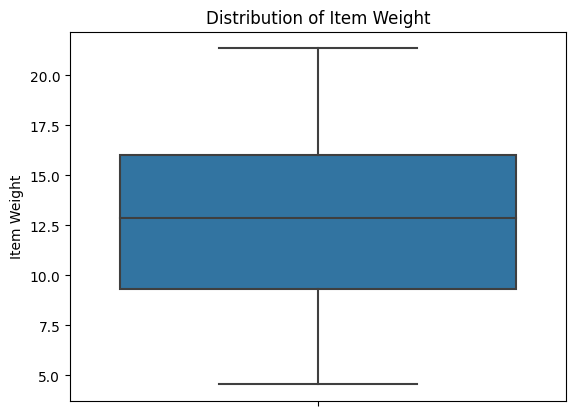

In [30]:

sns.boxplot(data=df_sales_predictions, y='Item_Weight')
plt.ylabel('Item Weight')
plt.title('Distribution of Item Weight')
plt.show()

The box plot is comparatively short This suggests that overall Weight of items  have a high level. The longer the box, the more dispersed the data. The smaller, the less dispersed the data.

the median is closer to the top of the box, and the whisker is shorter on the upper end of the box, so the distribution is negatively skewed (skewed left).

Outliers: There are no outliers in the item weight boxplot.

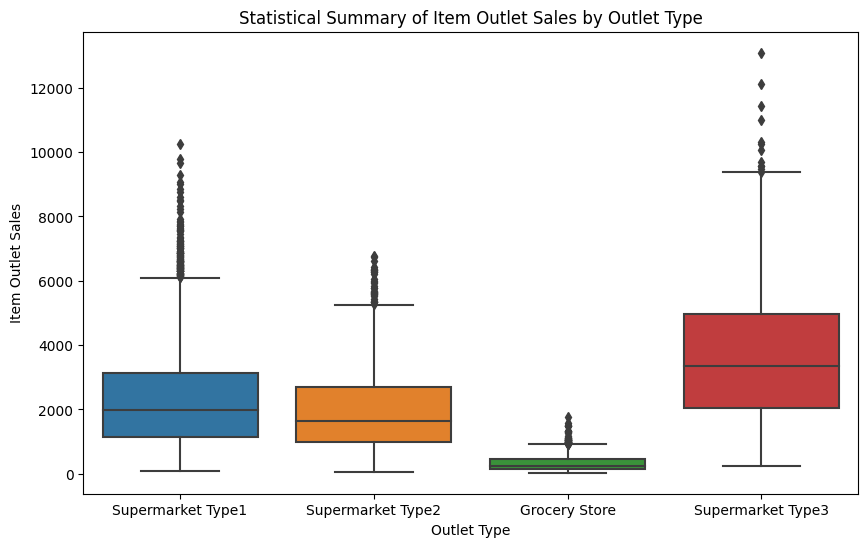

In [44]:
# Create boxplot for 'Item_Outlet_Sales' by 'Outlet_Type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sales_predictions, x='Outlet_Type', y='Item_Outlet_Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Statistical Summary of Item Outlet Sales by Outlet Type')
plt.show()

The supermarket Type 3 has the highest median than the other boxes. Therefore The supermarket Type 3 box did better on average as it have the largest median.

in the box plot below it can be seen that The supermarket Type 3 box has a larger spread than the others:

The supermarket Type 3 box has a longer plot from whisker to whisker. Therefore it has a larger range. On a boxplot we can see this visually.

The supermarket Type 3 box has a longer box portion of the boxplot and so, it has a larger interquartile range. We can also see this visually.

Because Grocery Store box has the smallest range and interquartile range, it has the most consistent results.

all 4 boxes have a positive skew(Right skew) with the highest number of outliers in The supermarket Type 1 box compared to the other boxes

Text(0.5, 1.0, 'Item outlet sales by ItemType and outlet size ')

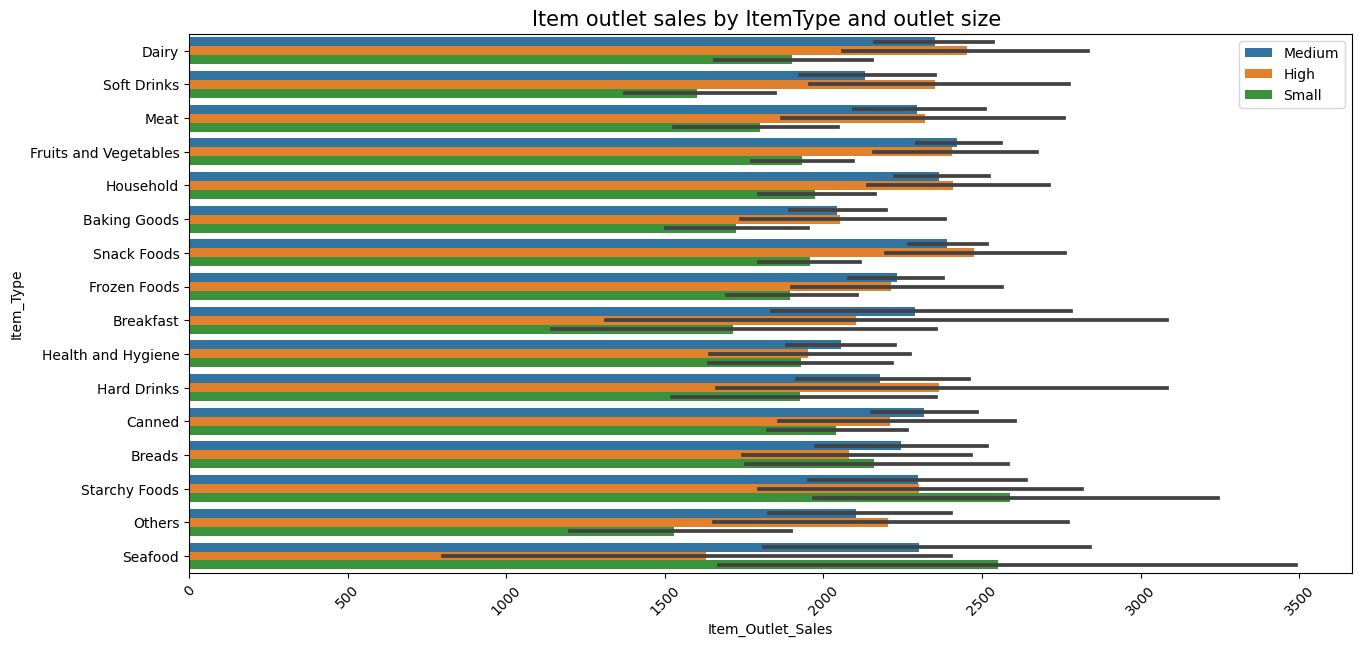

In [38]:
plt.figure(figsize=(15,7));
sns.barplot(data=df_sales_predictions, x='Item_Outlet_Sales', y='Item_Type',hue='Outlet_Size');
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation = 45);
plt.title('Item outlet sales by ItemType and outlet size ',fontsize=15)

**Using this barplot, we can observe all the Item outlet sales by ItemType (Frozen Foods, Seafood, soft Drinks etc...) and outlet size (small, medium and high)**

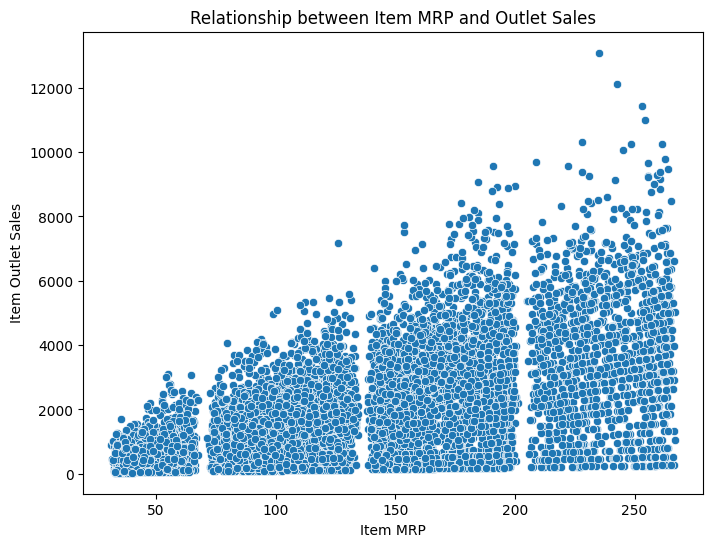

In [33]:
#Scatter Plot of Item MRP vs. Item Outlet Sales:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sales_predictions, x='Item_MRP', y='Item_Outlet_Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item MRP and Outlet Sales')
plt.show()

This scatter plot shows the relationship between the item maximum retail price (MRP) and the corresponding outlet sales. Each point on the plot represents a specific item, with its MRP on the x-axis and the sales generated from the outlet on the y-axis. The plot helps identify any potential correlation or patterns between the MRP and sales, such as whether higher-priced items tend to generate higher sales.

**and in this case the higher the item MRP is, the higher sales (item outlet_sales) it generates**

### PS:MRP definition "to refresh memory"
* MRP, the Maximum Retail Price is the full form of MRP. The manufacturer of a product calculates it, and it is the highest possible price one can charge for that product from a customer. It comprises all the taxes levied on that product.

* The objective of having a maximum retail price is to ensure that the customers are not charged anything beyond that amount. Moreover, with MRP printed on a product’s packaging, sellers’ scope to sell goods to customers at a higher price becomes negligible. Therefore, it restricts the shopkeepers from fooling the customers by charging anything above the product’s printed price.
*******************************

<ipython-input-32-1c40cc03bc7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_sales_predictions.corr()


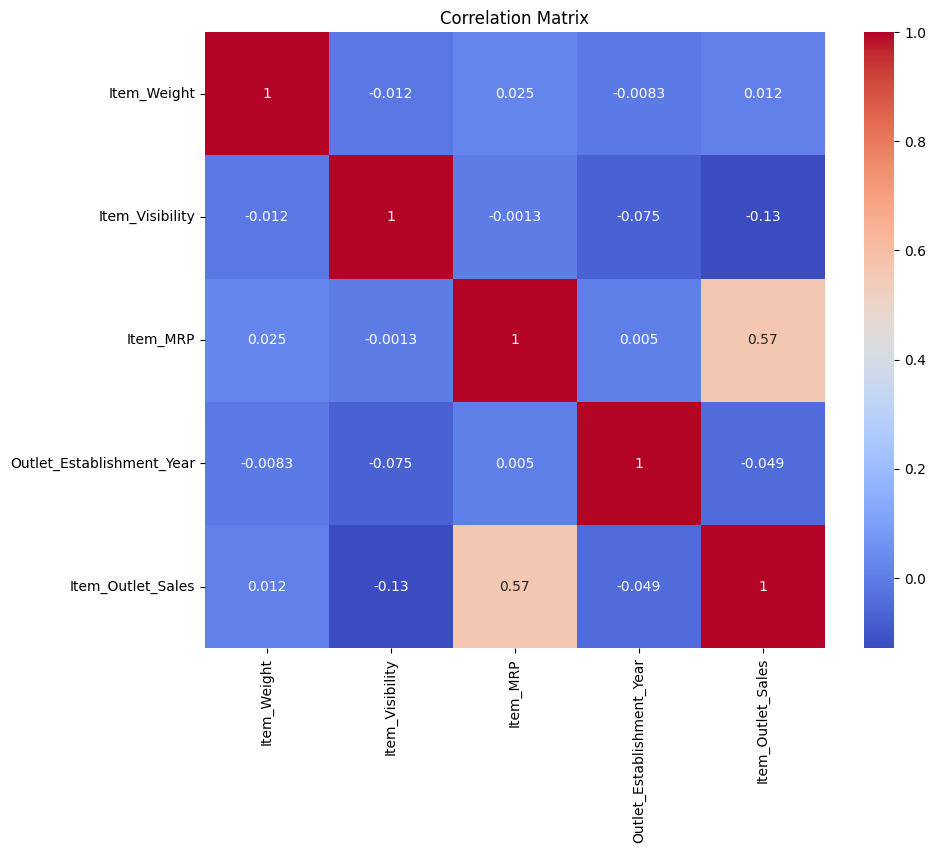

In [32]:
plt.figure(figsize=(10, 8))
corr_matrix = df_sales_predictions.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

After plotting the heatmap, we can observe a correlation coefficient of 0.57 between the item outlet sales and the item MRP. This correlation coefficient value indicates a moderate positive correlation between the two variables.
This means that there is a tendency for higher sales to be associated with higher MRPs, but the relationship is not extremely strong.